In [1]:
import os

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob

%matplotlib inline

In [2]:
from liba import *

# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:  
- сохраненные маски для картинок из `valid` в формате `pred_valid_template.csv`;
- html страницу с предсказанием модели для всех картинок из `test` и папку с используемыми картинками в этой html странице.  
  
Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (можно прямо в ноутбуке) с описанием Вашего исследования, гипотез и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

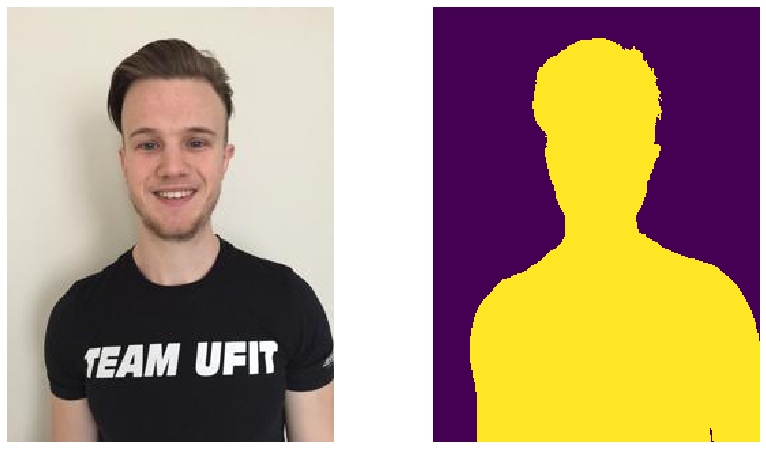

(320, 240, 3)


In [3]:
#print(sys.path)
path = "data/train"
images = os.listdir(path)
ind = np.random.choice(images).split(".")[0]

img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
#img[:,:,0] = np.fliplr(img[:,:,0])
#img[:,:,1] = np.fliplr(img[:,:,1])
#img[:,:,2] = np.fliplr(img[:,:,2])
show_img_with_mask(img, mask)
print(img.shape)

Пример подсчета метрики:

In [4]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
get_dice(mask, random_mask)

0.501394058070623

Можно для последовательности масок вычислить среднее значение метрики:

In [5]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
get_dice(random_masks_1, random_masks_2)

0.4998742508743369

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [6]:
rle_mask = encode_rle(mask)
rle_mask

'5638 10 5869 22 6107 26 6345 30 6583 33 6617 1 6821 37 7059 41 7108 1 7299 41 7342 1 7348 1 7538 43 7582 3 7586 4 7775 58 8014 60 8253 62 8492 63 8729 66 8967 68 9205 70 9445 71 9517 1 9684 74 9923 75 10162 77 10402 77 10639 81 10879 82 10962 1 11118 83 11202 1 11358 85 11597 86 11837 86 12077 87 12317 88 12557 89 12797 88 13036 89 13277 87 13517 88 13756 89 13996 90 14236 90 14476 90 14716 91 14955 93 15195 93 15435 92 15675 92 15915 93 16155 91 16247 1 16395 91 16488 1 16634 93 16874 93 17114 93 17354 93 17594 94 17834 94 18075 93 18315 94 18555 94 18795 93 19035 91 19127 1 19275 93 19516 89 19606 2 19756 89 19847 1 19996 89 20237 88 20477 87 20718 87 20959 85 21200 84 21440 84 21681 83 21923 81 22163 81 22404 80 22645 79 22883 81 23125 79 23365 79 23605 79 23845 78 24084 79 24324 83 24565 83 24804 84 25043 85 25283 85 25523 84 25763 84 26003 84 26243 84 26484 82 26724 81 26964 81 27204 80 27444 80 27685 78 27925 78 28165 78 28405 78 28646 76 28886 76 29126 76 29366 75 29606 74 2984

Теперь восстановим маску:

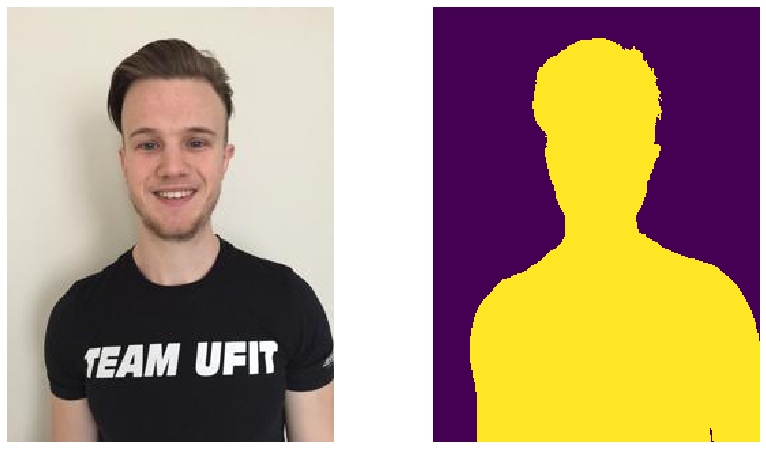

In [7]:
decoded_mask = decode_rle(rle_mask)
show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [37]:
pred = pd.read_csv("data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1315,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
1,1316,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
2,1317,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
3,1318,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
4,1319,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...


Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [ ]:
paths_to_imgs = sorted(glob("data/valid/*"))
pred_masks = [np.array(Image.open(path)) for path in sorted(glob("data/valid_mask/*"))]

_ = get_html(paths_to_imgs, pred_masks, path_to_save="results/example")

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.

## Решение

Один из самых широко используемых методов сегментации это U-Net like нейронные сети.  

Узнать, как работает U-Net, можно, например, отсюда: https://neurohive.io/ru/vidy-nejrosetej/u-net-image-segmentation/ или http://blog.datalytica.ru/2018/03/unet.html, 

а посмотреть её работу на примере здесь: https://habr.com/ru/company/ods/blog/431512/.

Поэтому я решила применить этот подход здесь. 
##### Реализация такой сети была взята отсюда: https://github.com/milesial/Pytorch-UNet
Код, описывающий создание модели  и обучение сети, находится в папке lib, в файлах trainNet.py и Unet.py.


В качестве фреймворка для реализации решения можно было выбирать из нескольких вариантов (https://habr.com/ru/company/otus/blog/443874/), но я остановила выбор на pyTorch, потому что у меня маленький опыт в deep learning, а это простой и популярный фреймворк, хорошо походящий новичкам. К тому же, в интернете можно найти много примеров кода именно с использованием этого фреймворка.

Так как у меня нет мощной дискретной видеокарты, код я выполняла в Google Colab.

In [8]:
import torch

In [ ]:
net = UNet(n_channels=3, n_classes=1)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

train_net(Image, net)

К сожалению, получившийся результат можно увидеть только в файле из Google Colab, поскольку на моём ноутбуке недостаточно ресурсов для выполнения данной ячейки. Результаты обучения:

Epoch finished ! Loss: 15.999179031699896

Validation Dice Coeff: 0.8783856695869944

Starting epoch 2/10.

Epoch finished ! Loss: 11.290710316970944

Validation Dice Coeff: 0.9088494187777805

Starting epoch 3/10.

Epoch finished ! Loss: 9.281637797132134

Validation Dice Coeff: 0.9230234430417982

Starting epoch 4/10.

Epoch finished ! Loss: 8.053338013589382

Validation Dice Coeff: 0.9312050871013366

Starting epoch 5/10.

Epoch finished ! Loss: 7.006813804619014

Validation Dice Coeff: 0.9302850048156948

Starting epoch 6/10.

Epoch finished ! Loss: 6.319837831892073

Validation Dice Coeff: 0.9253954125433853

Starting epoch 7/10.

Epoch finished ! Loss: 5.306257591117173

Validation Dice Coeff: 0.9314717140394387

Starting epoch 8/10.

Epoch finished ! Loss: 5.218970791902393

Validation Dice Coeff: 0.9357895253040537

Starting epoch 9/10.

Epoch finished ! Loss: 5.028564332053065

Validation Dice Coeff: 0.9297703410341978

Starting epoch 10/10.

Epoch finished ! Loss: 4.079371586441994

Validation Dice Coeff: 0.9293788737038157

Таким образом, результаты хорошие, почти 93% на validation. 

Правда, при обучении данной сети возникла проблема переобучения, поэтому я попробовала ввести аугментацию. В качестве аугментации я использовала отражение вокруг вертикальной оси, потому что этот вид аугментации наименее портит входные признаки. Иными словами, эксперименты показали, что ёмкости этой сети недостаточно для работы с перевёрнутыми изображениями человека, по крайней мере, при числе эпох, заданном мной.

К сожалению, качество работы сети при этом ухудшилось, поэтому в финальный вариант я её не стала добавлять.

Осталось получить маски для картинок из valid и записать их в файл csv.

In [206]:
from skimage.transform import resize

def get_net_out(net, dir_img, start, end, gpu=False):
    net.eval()
    out = []
    #print(len(list(imgs)))
    for i in range(start, end):
        im = resize_and_crop(Image.open(dir_img + str(i) + '.jpg'), scale=0.5)
        img = hwc_to_chw(im)
        img = normalize(img)
        #print(img.shape)
        img = torch.from_numpy(img).unsqueeze(0)
        #print(img.shape)

        if gpu:
            img = img.cuda()

        mask_pred = net(img)[0]
        mask_pred = (mask_pred > 0.5).float()
        #mask_pred = (mask_pred * 255).int()
        res = np.squeeze(mask_pred.cpu().detach().numpy())
        res = resize(res, (320, 240))
        #print(res.sum())
        out.append((res * 255).astype(np.uint8))
        
    return out

out_imgs = get_net_out(net, 'data/valid/', 1315, 1460, True)
print(out_imgs[0].max())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


255


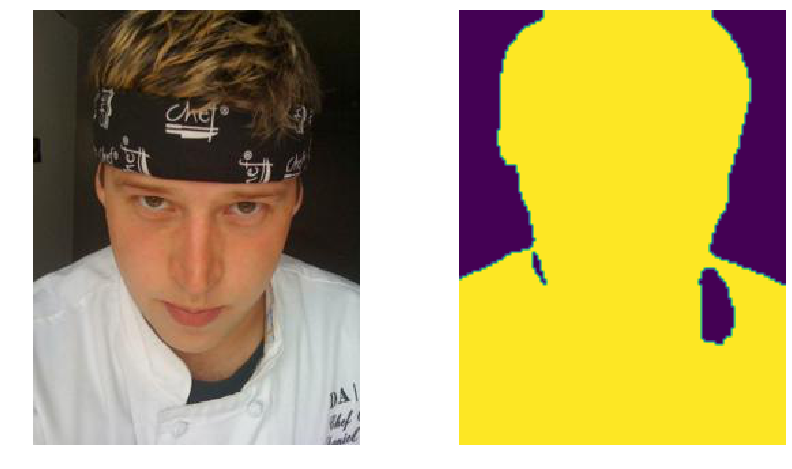

(320, 240)
145


In [207]:
img = np.array(Image.open(f"data/valid/1315.jpg"))
show_img_with_mask(img, out_imgs[0])

print(out_imgs[0].shape)
print(len(out_imgs))
#out_imgs = out_imgs[:145]

In [209]:
pred = pd.read_csv("data/pred_valid_template.csv")
for i, m in enumerate(out_imgs):
  #print(pred['id'][i])
    print(m)
    en_r = encode_rle(m)
  #print(pred['rle_mask'][i].shape)
  #pred['rle_mask'][i] = encode_rle(m)
pred.to_csv("data/val_out.csv")

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


ValueError: ignored

При использовании функции encode_rle() возникла ошибка, поэтому сохранить маски для картинок из value мне не удалось.

In [147]:
 pred = pd.read_csv("data/val_out.csv")
pred.head()

,Unnamed: 0,id,rle_mask
0,0,1315,NaN
1,1,1316,NaN
2,2,1317,NaN
3,3,1318,NaN
4,4,1319,NaN


Теперь получим предсказания модели для всех картинок из тест и сохраним их в папке test_mask

In [210]:
test_imgs = get_net_out(net, 'data/test/',1460,1560,True)
print(len(test_imgs))
from PIL import Image

for i, m in enumerate(test_imgs):
    img = Image.fromarray(m)
    img.save('data/test_mask/' + str(1460 + i) + '.png')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


100


Создадим html-страницу, где можно посмотреть результаты работы сети на тестовых картинках.

In [0]:
paths_to_imgs = sorted(glob("data/test/*"))
pred_masks = [np.array(Image.open(path)) for path in sorted(glob("data/test_mask/*"))]

_ = get_html(paths_to_imgs, pred_masks, path_to_save="test_out")